# Car Sale Analysis
### By : Rohan Anand Shetty

In [197]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

#### The Data  Set
* This car sales data is from Kaggle and explains the type of manufacturers different types of models what are the specifications of the cars such as engine size about its horsepower about its wheelbase about the length and width and other important features that affect the price of the vehicle.
* One of the important features among this data Sales and resale value with respect to ear which depicts unique aspects of modern car industry where pricing of each individual car can be ordered accordingly to the above features.

In [158]:
data = pd.read_csv("Car_sales.csv")
data.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Data Preprocessing 

#### 1) Check for Missing Values
* Handling missing values it's in key preprocessing step for modeling purposes and analysis of the data.

In [159]:
data.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

* Impute missing values using kNN Imputer With number of neighbor equal to 3

In [160]:
data[['__year_resale_value']]= KNNImputer(n_neighbors=3).fit_transform(data[['__year_resale_value']])
data[['Price_in_thousands']]= KNNImputer(n_neighbors=3).fit_transform(data[['Price_in_thousands']])
data[['Engine_size']]= KNNImputer(n_neighbors=3).fit_transform(data[['Engine_size']])
data[['Horsepower']]= KNNImputer(n_neighbors=3).fit_transform(data[['Horsepower']])
data[['Wheelbase']]= KNNImputer(n_neighbors=3).fit_transform(data[['Wheelbase']])
data[['Width']]= KNNImputer(n_neighbors=3).fit_transform(data[['Width']])
data[['Length']]= KNNImputer(n_neighbors=3).fit_transform(data[['Length']])
data[['Curb_weight']]= KNNImputer(n_neighbors=3).fit_transform(data[['Curb_weight']])
data[['Fuel_capacity']]= KNNImputer(n_neighbors=3).fit_transform(data[['Fuel_capacity']])
data[['Fuel_efficiency']]= KNNImputer(n_neighbors=3).fit_transform(data[['Fuel_efficiency']])
data[['Power_perf_factor']]= KNNImputer(n_neighbors=3).fit_transform(data[['Power_perf_factor']])

* Cleaned data

In [161]:
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

#### 2) Type verifications
* Firstly, Handling Miss Classified features in a data through appropriate conversion is crucial. 
* Secondly converting categorical features into numerics provides easy processing of data.

In [162]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  157 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   157 non-null    float64
 6   Engine_size          157 non-null    float64
 7   Horsepower           157 non-null    float64
 8   Wheelbase            157 non-null    float64
 9   Width                157 non-null    float64
 10  Length               157 non-null    float64
 11  Curb_weight          157 non-null    float64
 12  Fuel_capacity        157 non-null    float64
 13  Fuel_efficiency      157 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    157 non-null    flo

In [163]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [164]:
data =data.join(pd.DataFrame(encoder.fit_transform(data[['Vehicle_type']]).toarray(), columns =['Passenger','Car']))

In [165]:
data[['Manufacturer','Model']] = OrdinalEncoder().fit_transform(data[['Manufacturer','Model']])

In [166]:
data['Latest_Launch']=data['Latest_Launch'].astype('datetime64[ns]')
data['Latest_Launch']= pd.to_numeric(data['Latest_Launch'])

In [167]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    float64
 1   Model                157 non-null    float64
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  157 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   157 non-null    float64
 6   Engine_size          157 non-null    float64
 7   Horsepower           157 non-null    float64
 8   Wheelbase            157 non-null    float64
 9   Width                157 non-null    float64
 10  Length               157 non-null    float64
 11  Curb_weight          157 non-null    float64
 12  Fuel_capacity        157 non-null    float64
 13  Fuel_efficiency      157 non-null    float64
 14  Latest_Launch        157 non-null    int64  
 15  Power_perf_factor    157 non-null    flo

#### 3) Corelation Analysis

<AxesSubplot:>

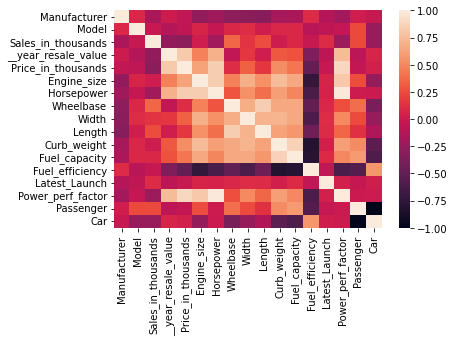

In [168]:
corelations = data.corr()
sns.heatmap(corelations)

In [169]:
data.corr()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Passenger,Car
Manufacturer,1.000000,0.078708,-0.155837,0.000934,-0.052681,-0.272530,-0.214353,-0.288292,-0.300424,-0.313672,-0.178225,-0.155206,0.104276,-0.110933,-0.180026,0.020050,-0.020050
Model,0.078708,1.000000,-0.015833,-0.102023,-0.056462,0.065054,-0.030975,0.089875,0.109569,0.027559,0.081115,0.091433,-0.087718,-0.058248,-0.032370,0.235416,-0.235416
Sales_in_thousands,-0.155837,-0.015833,1.000000,-0.266436,-0.304413,0.019983,-0.197756,0.358179,0.140918,0.254979,0.008620,0.086540,-0.016747,0.104658,-0.223017,0.242183,-0.242183
__year_resale_value,0.000934,-0.102023,-0.266436,1.000000,0.822395,0.468781,0.696888,-0.047803,0.159580,0.023867,0.297130,0.275026,-0.358137,-0.064487,0.743783,-0.077119,0.077119
Price_in_thousands,-0.052681,-0.056462,-0.304413,0.822395,1.000000,0.626839,0.838450,0.110511,0.329109,0.156874,0.523753,0.423230,-0.491489,-0.023226,0.897945,-0.043695,0.043695
Engine_size,-0.272530,0.065054,0.019983,0.468781,0.626839,1.000000,0.837360,0.472130,0.690398,0.541424,0.754668,0.663022,-0.733920,0.068493,0.818481,0.256543,-0.256543
Horsepower,-0.214353,-0.030975,-0.197756,0.696888,0.838450,0.837360,1.000000,0.286308,0.539158,0.393364,0.605226,0.499907,-0.610648,0.060795,0.991464,0.004646,-0.004646
Wheelbase,-0.288292,0.089875,0.358179,-0.047803,0.110511,0.472130,0.286308,1.000000,0.683135,0.839639,0.650211,0.654044,-0.497023,0.083672,0.258847,0.384474,-0.384474
Width,-0.300424,0.109569,0.140918,0.159580,0.329109,0.690398,0.539158,0.683135,1.000000,0.710435,0.718010,0.656302,-0.599465,0.116186,0.511982,0.243941,-0.243941
Length,-0.313672,0.027559,0.254979,0.023867,0.156874,0.541424,0.393364,0.839639,0.710435,1.000000,0.625055,0.563540,-0.443993,0.104166,0.353956,0.134027,-0.134027


#### 4) Outlier Removal
* for Better Model Performance

In [185]:
data = data[(np.abs(stats.zscore(data.loc[:,~data.columns.isin(['Vehicle_type'])]))<3).all(axis=1)]

#### 5) Train Test Split
By guaranteeing that variables are on a same scale and that the data has a normal distribution, the StandardScaler() preprocessing technique helps to scale and normalize data, which enhances the performance and accuracy of machine learning models.

In [186]:
x = data.loc[:,~data.columns.isin(['Vehicle_type','Sales_in_thousands'])]
y = data[['Sales_in_thousands']]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state =125)

In [187]:
std_sclr = StandardScaler()
x_train = std_sclr.fit_transform(xtrain)
x_test = std_sclr.fit_transform(xtest)

### Data Modeling
#### 1) AdaBoost Regressor 

In [188]:
model1= AdaBoostRegressor()
model1.fit(x_train,ytrain)
ypred1=model1.predict(x_test)
print('\n Mean Absolute Error',mean_absolute_error(ytest,ypred1))
print('\n Root Mean Absolute Error',np.sqrt(mean_absolute_error(ytest,ypred1)))


 Mean Absolute Error 35.60156247593824

 Root Mean Absolute Error 5.966704490414976


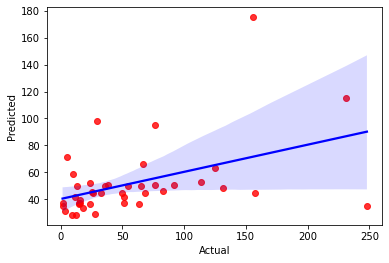

In [189]:
# Plotting Actual values vs prediction
plot = sns.regplot(ytest,ypred1,scatter_kws={"color": "red"}, line_kws={"color": "blue"},
            fit_reg = True)
plot.set(xlabel='Actual', ylabel='Predicted')
plt.show()

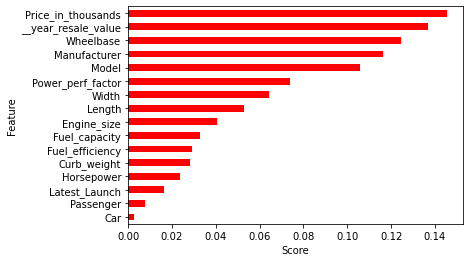

In [190]:
imp_features = pd.Series(model1.feature_importances_, index = x.columns)
imp_features = imp_features.sort_values(ascending = True)
imp_features.plot(kind = 'barh', color = 'red')
plt.ylabel("Feature")
plt.xlabel("Score")
plt.show()

#### 2) Decision Tree Regressor

In [191]:
model2= DecisionTreeRegressor()
model2.fit(x_train,ytrain)
ypred2=model2.predict(x_test)
print('\n Mean Absolute Error',mean_absolute_error(ytest,ypred2))
print('\n Root Mean Absolute Error',np.sqrt(mean_absolute_error(ytest,ypred2)))


 Mean Absolute Error 46.58192857142857

 Root Mean Absolute Error 6.82509549907022


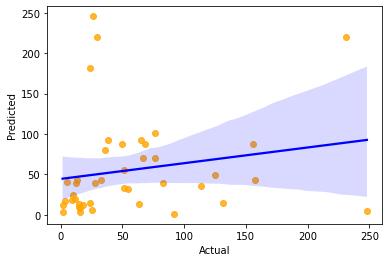

In [192]:
plot = sns.regplot(ytest,ypred2,scatter_kws={"color": "orange"}, line_kws={"color": "blue"},
                   fit_reg = True)
plot.set(xlabel='Actual', ylabel='Predicted')
plt.show()

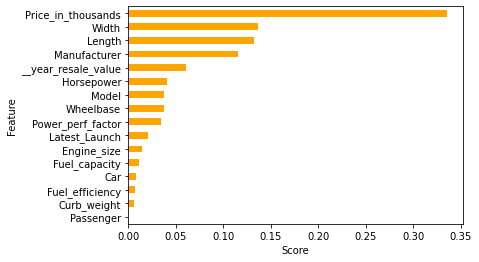

In [193]:
imp_features = pd.Series(model2.feature_importances_, index = x.columns)
imp_features = imp_features.sort_values(ascending = True)
imp_features.plot(kind = 'barh', color = 'orange')
plt.ylabel("Feature")
plt.xlabel("Score")
plt.show()

#### 3) Gradient Boosting Regressor

In [194]:
model3= GradientBoostingRegressor()
model3.fit(x_train,ytrain)
ypred3=model3.predict(x_test)
print('\n Mean Absolute Error',mean_absolute_error(ytest,ypred3))
print('\n Root Mean Absolute Error',np.sqrt(mean_absolute_error(ytest,ypred3)))


 Mean Absolute Error 36.74192286572342

 Root Mean Absolute Error 6.061511599075219


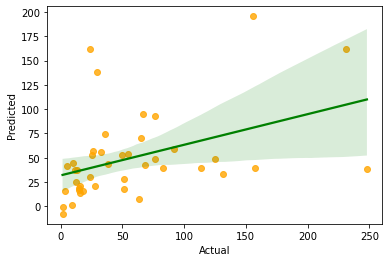

In [195]:
plot = sns.regplot(ytest,ypred3,scatter_kws={"color": "orange"}, line_kws={"color": "green"},
                   fit_reg = True)
plot.set(xlabel='Actual', ylabel='Predicted')
plt.show()

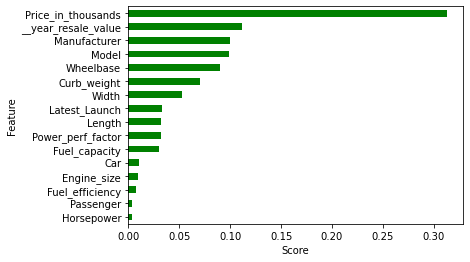

In [196]:
imp_features = pd.Series(model3.feature_importances_, index = x.columns)
imp_features = imp_features.sort_values(ascending = True)
imp_features.plot(kind = 'barh', color = 'green')
plt.ylabel("Feature")
plt.xlabel("Score")
plt.show()

### Conclusion
In the above models I have used various machine learning techniques to determine what are the features that affect the sales of a car and here are the following conclusions made:- 

* We have used ADA boosters decision tree and gradient booster algorithms, out of which, ADA booster algorithm gives the highest accuracy in the form of root mean absolute error of 5.96  

* With respect target variable sales, features like length, wheelbase, price, the resale value with respect to year, its model, fuel capacity, curb weight, manufacturer are few features that highly influent . 

* Thus we conclude with the belief that improvement and adjustments in these highly influential features can increase or develop the price of a car.